In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
# Import data from yahoo finance and create dataframe
apple_chart = pd.read_csv('Stock charts/AAPL.csv')

In [265]:
apple_chart.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-11,117.809998,118.180000,113.330002,113.489998,104.877724,97082800
1,2015-08-12,112.529999,115.419998,109.629997,115.239998,106.494896,101217500
2,2015-08-13,116.040001,116.400002,114.540001,115.150002,106.411743,48535800
3,2015-08-14,114.320000,116.309998,114.010002,115.959999,107.160263,42929500
4,2015-08-17,116.040001,117.650002,115.500000,117.160004,108.269211,40884700


In [266]:
#inspect data for any missing values
apple_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
Date         1260 non-null object
Open         1260 non-null float64
High         1260 non-null float64
Low          1260 non-null float64
Close        1260 non-null float64
Adj Close    1260 non-null float64
Volume       1260 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [267]:
# Drop unnecessary columns 
apple_chart.drop(columns = ['High', 'Close','Low', 'Volume'],inplace = True)

In [268]:
apple_chart

,Date,Open,Adj Close
0,2015-08-11,117.809998,104.877724
1,2015-08-12,112.529999,106.494896
2,2015-08-13,116.040001,106.411743
3,2015-08-14,114.320000,107.160263
4,2015-08-17,116.040001,108.269211
...,...,...,...
1255,2020-08-05,437.510010,439.457642
1256,2020-08-06,441.619995,454.790009
1257,2020-08-07,452.820007,444.450012
1258,2020-08-10,450.399994,450.910004


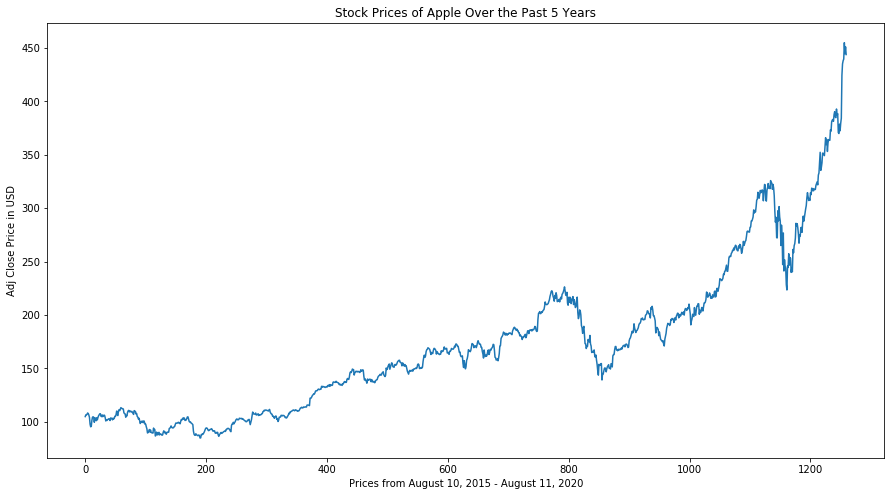

In [122]:
plt.figure(figsize = (15,8))
plt.plot(apple_chart['Adj Close'])
plt.title('Stock Prices of Apple Over the Past 5 Years')
plt.xlabel('Prices from August 10, 2015 - August 11, 2020')
plt.ylabel('Adj Close Price in USD')
plt.show()

In [255]:
#Create a simple moving average with a 30 day window
SMA_30 = pd.DataFrame()
SMA_30['Adj_Close_Price'] = apple_chart['Adj Close'].rolling(window = 30).mean()
SMA_30

,Adj_Close_Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1255,383.628314
1256,386.807582
1257,389.483136
1258,392.747017


In [113]:
SMA_100 = pd.DataFrame()
SMA_100['Adj_close_price'] = apple_chart['Adj Close'].rolling(window = 100).mean()
SMA_100

,Adj_close_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1255,321.145499
1256,323.282185
1257,325.209450
1258,327.262937


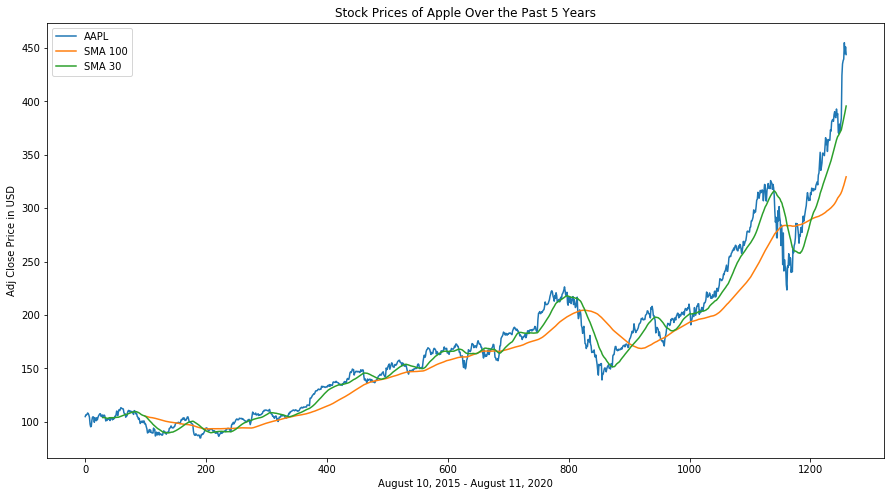

In [129]:
plt.figure(figsize = (15,8))
plt.plot(apple_chart['Adj Close'], label = 'AAPL')
plt.plot(SMA_100['Adj_close_price'], label = 'SMA 100')
plt.plot(SMA_30['Adj_Close_Price'], label = 'SMA 30')
plt.title('Stock Prices of Apple Over the Past 5 Years')
plt.xlabel('August 10, 2015 - August 11, 2020')
plt.ylabel('Adj Close Price in USD')
plt.legend()
plt.show()

In [198]:
# Create a dataframe of all adj close prices
data = pd.DataFrame()
data['Date'] = apple_chart['Date']
data['AAPL_adj_close'] = apple_chart['Adj Close']
data['SMA_30'] = SMA_30['Adj_Close_Price']
data['SMA_100']= SMA_100['Adj_close_price']
data

,Date,AAPL_adj_close,SMA_30,SMA_100
0,2015-08-11,104.877724,NaN,NaN
1,2015-08-12,106.494896,NaN,NaN
2,2015-08-13,106.411743,NaN,NaN
3,2015-08-14,107.160263,NaN,NaN
4,2015-08-17,108.269211,NaN,NaN
...,...,...,...,...
1255,2020-08-05,439.457642,383.628314,321.145499
1256,2020-08-06,454.790009,386.807582,323.282185
1257,2020-08-07,444.450012,389.483136,325.209450
1258,2020-08-10,450.910004,392.747017,327.262937


In [201]:
#Create a Function to signal when to buy and sell
def buy_sell(data):
    sig_price_buy = []
    sig_price_sell = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA_30'][i] > data['SMA_100'][i]:
            if flag != 1:
                sig_price_buy.append(data['AAPL_adj_close'][i])
                sig_price_sell.append(np.nan)
                #print(data['Date'][i])
                flag = 1
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        elif data['SMA_30'][i] < data['SMA_100'][i]:
            if flag !=0:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(data['AAPL_adj_close'][i])
                #print(data['Date'][i])
                flag = 0
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)
        else:
            sig_price_buy.append(np.nan)
            sig_price_sell.append(np.nan)
            
    return (sig_price_buy, sig_price_sell)

In [202]:
#store the buy and sell data into a variable

buy_sell = buy_sell(data)
data['buy_signal_price'] = buy_sell[0]
data['sell_signal_price']=buy_sell[1]

In [203]:
data

,Date,AAPL_adj_close,SMA_30,SMA_100,buy_signal_price,sell_signal_price
0,2015-08-11,104.877724,NaN,NaN,NaN,NaN
1,2015-08-12,106.494896,NaN,NaN,NaN,NaN
2,2015-08-13,106.411743,NaN,NaN,NaN,NaN
3,2015-08-14,107.160263,NaN,NaN,NaN,NaN
4,2015-08-17,108.269211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1255,2020-08-05,439.457642,383.628314,321.145499,NaN,NaN
1256,2020-08-06,454.790009,386.807582,323.282185,NaN,NaN
1257,2020-08-07,444.450012,389.483136,325.209450,NaN,NaN
1258,2020-08-10,450.910004,392.747017,327.262937,NaN,NaN


In [221]:
#Looking for the dates of the buy signals
buy_dates = data.loc[data['buy_signal_price']>0]
buy_dates

,Date,AAPL_adj_close,SMA_30,SMA_100,buy_signal_price,sell_signal_price
99,2015-12-31,97.688629,105.309006,105.214290,97.688629,NaN
166,2016-04-08,101.391273,97.869110,97.514481,101.391273,NaN
252,2016-08-10,101.938248,94.470048,94.122502,101.938248,NaN
651,2018-03-13,174.193893,164.950839,164.833587,174.193893,NaN
691,2018-05-09,181.346710,166.664875,166.592702,181.346710,NaN
905,2019-03-18,184.756653,171.603329,171.539505,184.756653,NaN
1202,2020-05-20,318.655487,291.069304,289.823247,318.655487,NaN


In [222]:
#Looking for the dates of the sell signals
sell_dates = data.loc[data['sell_signal_price']>0]
sell_dates

,Date,AAPL_adj_close,SMA_30,SMA_100,buy_signal_price,sell_signal_price
100,2016-01-04,97.772148,104.939635,105.143235,NaN,97.772148
194,2016-05-18,88.771683,93.800981,93.854013,NaN,88.771683
647,2018-03-07,169.412445,163.770296,163.961494,NaN,169.412445
681,2018-04-25,158.397659,165.860226,166.040898,NaN,158.397659
827,2018-11-20,173.165588,203.879329,204.450560,NaN,173.165588
1162,2020-03-24,245.770386,282.436834,283.484213,NaN,245.770386


In [223]:
buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
buy_dates, sell_dates

(            Date  AAPL_adj_close  buy_signal_price
 99    2015-12-31       97.688629         97.688629
 166   2016-04-08      101.391273        101.391273
 252   2016-08-10      101.938248        101.938248
 651   2018-03-13      174.193893        174.193893
 691   2018-05-09      181.346710        181.346710
 905   2019-03-18      184.756653        184.756653
 1202  2020-05-20      318.655487        318.655487,
             Date  AAPL_adj_close  sell_signal_price
 100   2016-01-04       97.772148          97.772148
 194   2016-05-18       88.771683          88.771683
 647   2018-03-07      169.412445         169.412445
 681   2018-04-25      158.397659         158.397659
 827   2018-11-20      173.165588         173.165588
 1162  2020-03-24      245.770386         245.770386)

In [243]:
dates = pd.concat([buy_dates, sell_dates],sort = True)
dates

,AAPL_adj_close,Date,buy_signal_price,sell_signal_price
99,97.688629,2015-12-31,97.688629,NaN
166,101.391273,2016-04-08,101.391273,NaN
252,101.938248,2016-08-10,101.938248,NaN
651,174.193893,2018-03-13,174.193893,NaN
691,181.346710,2018-05-09,181.346710,NaN
905,184.756653,2019-03-18,184.756653,NaN
1202,318.655487,2020-05-20,318.655487,NaN
100,97.772148,2016-01-04,NaN,97.772148
194,88.771683,2016-05-18,NaN,88.771683
647,169.412445,2018-03-07,NaN,169.412445


In [244]:
# Now to organize by the dates, drop adj_close price column, and make date the index
dates.sort_values(by = 'Date', inplace = True)
dates.drop(columns = ['AAPL_adj_close'],inplace = True)
dates.set_index('Date', inplace = True)

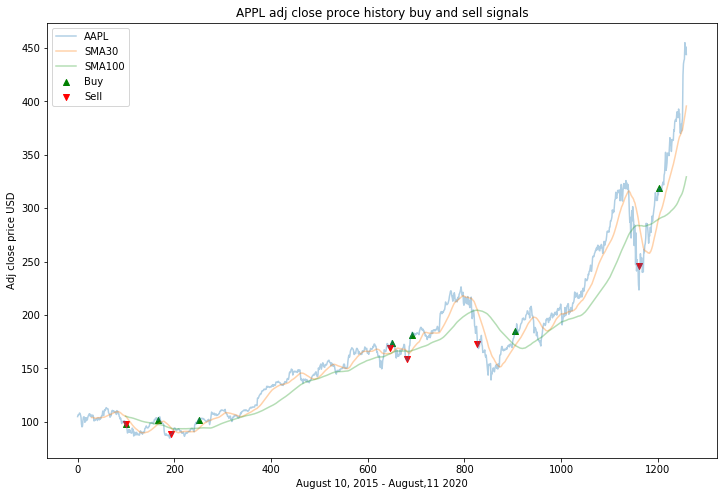

            buy_signal_price  sell_signal_price
Date                                           
2015-12-31         97.688629                NaN
2016-01-04               NaN          97.772148
2016-04-08        101.391273                NaN
2016-05-18               NaN          88.771683
2016-08-10        101.938248                NaN
2018-03-07               NaN         169.412445
2018-03-13        174.193893                NaN
2018-04-25               NaN         158.397659
2018-05-09        181.346710                NaN
2018-11-20               NaN         173.165588
2019-03-18        184.756653                NaN
2020-03-24               NaN         245.770386
2020-05-20        318.655487                NaN


In [245]:
#visualize data and strategy to buy and sell stock
plt.figure(figsize=(12,8))
plt.plot(data['AAPL_adj_close'],label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('APPL adj close proce history buy and sell signals')
plt.xlabel('August 10, 2015 - August,11 2020')
plt.ylabel('Adj close price USD')
plt.legend()
plt.show()
print(dates)